In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [12]:
dataFrame = pd.read_csv("Data/BCH_USD2.csv")

In [13]:
dataFrame['y'] = dataFrame['y'] #np.log()
dataFrame.head()

,ds,y
0,2017-08-02 00:00:00 UTC,767.767713
1,2017-08-03 00:00:00 UTC,398.843862
2,2017-08-04 00:00:00 UTC,234.618922
3,2017-08-05 00:00:00 UTC,206.843373
4,2017-08-06 00:00:00 UTC,216.019330


In [14]:
model = Prophet()
model.fit(dataFrame)

Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [15]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
168,2018-01-17
169,2018-01-18
170,2018-01-19
171,2018-01-20
172,2018-01-21


In [16]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
168,2018-01-17,3173.711860,2832.696138,3495.365614
169,2018-01-18,3163.276368,2847.051037,3504.356642
170,2018-01-19,3236.027538,2904.085828,3595.841756
171,2018-01-20,3217.075119,2851.793214,3564.410760
172,2018-01-21,3252.138832,2923.789909,3572.775619


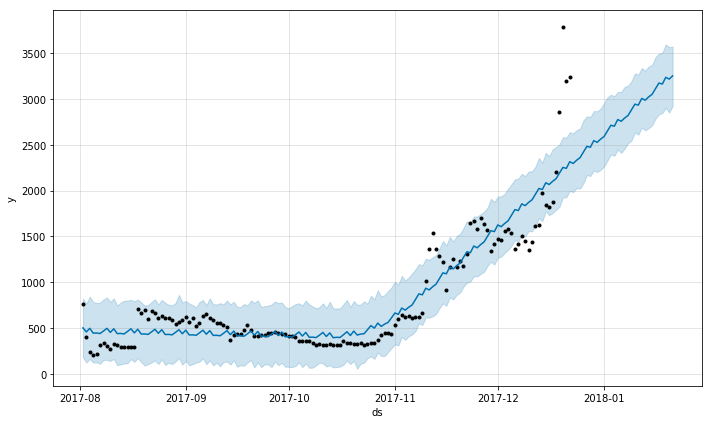

In [17]:
model.plot(forecast)

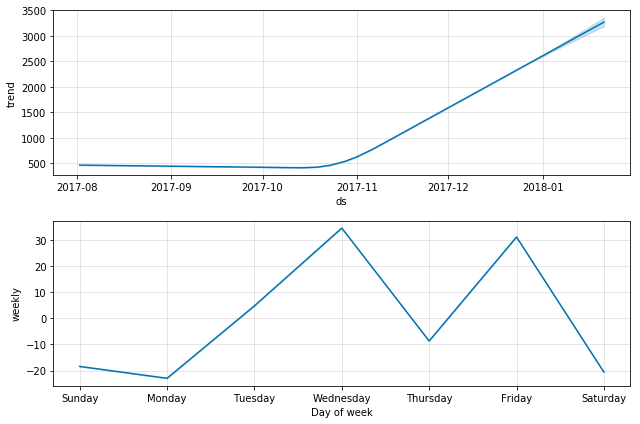

In [18]:
model.plot_components(forecast)